In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns
import os

# Create output directory for saving visualizations
output_dir = "quantum_gate_visualizations"
os.makedirs(output_dir, exist_ok=True)

# Set random seed for reproducibility
np.random.seed(42)

In [32]:
# Define quantum gates as 2x2 unitary matrices
def hadamard_gate():
    """Hadamard gate: Creates superposition"""
    return (1/np.sqrt(2)) * np.array([[1, 1], 
                                       [1, -1]], dtype=complex)

def phase_gate():
    """Phase gate (S gate): Adds π/2 phase"""
    return np.array([[1, 0], 
                     [0, 1j]], dtype=complex)

def t_gate():
    """T gate: Adds π/4 phase"""
    return np.array([[1, 0], 
                     [0, np.exp(1j * np.pi / 4)]], dtype=complex)

In [33]:
def apply_gates(state, gates):
    """Apply a sequence of gates to a quantum state"""
    result = state.copy()
    for gate in gates:
        result = gate @ result
    return result

def state_to_bloch(state):
    """Convert quantum state to Bloch sphere coordinates"""
    # Normalize the state
    state = state / np.linalg.norm(state)
    
    # Extract amplitudes
    alpha = state[0]
    beta = state[1]
    
    # Calculate Bloch coordinates
    x = 2 * np.real(np.conj(alpha) * beta)
    y = 2 * np.imag(np.conj(alpha) * beta)
    z = np.abs(alpha)**2 - np.abs(beta)**2
    
    return x, y, z

In [34]:
def visualize_bloch_sphere(states_dict, title, filename):
    """Visualize quantum states on the Bloch sphere"""
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Draw the Bloch sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x_sphere = np.outer(np.cos(u), np.sin(v))
    y_sphere = np.outer(np.sin(u), np.sin(v))
    z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x_sphere, y_sphere, z_sphere, alpha=0.1, color='cyan')
    
    # Draw axes
    ax.plot([-1, 1], [0, 0], [0, 0], 'k-', linewidth=0.5)
    ax.plot([0, 0], [-1, 1], [0, 0], 'k-', linewidth=0.5)
    ax.plot([0, 0], [0, 0], [-1, 1], 'k-', linewidth=0.5)
    
    # Label axes
    ax.text(1.2, 0, 0, 'X', fontsize=12, fontweight='bold')
    ax.text(0, 1.2, 0, 'Y', fontsize=12, fontweight='bold')
    ax.text(0, 0, 1.2, '|0⟩', fontsize=12, fontweight='bold')
    ax.text(0, 0, -1.2, '|1⟩', fontsize=12, fontweight='bold')
    
    # Plot states
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
    for idx, (label, state) in enumerate(states_dict.items()):
        x, y, z = state_to_bloch(state)
        ax.scatter([x], [y], [z], color=colors[idx % len(colors)], 
                  s=200, marker='o', edgecolors='black', linewidths=2, label=label)
        ax.plot([0, x], [0, y], [0, z], color=colors[idx % len(colors)], 
               linewidth=2, linestyle='--', alpha=0.7)
    
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.set_zlim([-1.2, 1.2])
    ax.set_box_aspect([1,1,1])
    ax.legend(loc='upper right', fontsize=10)
    ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
    
    # Save the figure
    fig.savefig(f"{output_dir}/{filename}.png", dpi=300, bbox_inches='tight')
    print(f"✓ Saved Bloch sphere visualization: {output_dir}/{filename}.png")
    
    return fig

In [35]:
def compare_gate_orders():
    """Compare different orderings of H, P, and T gates"""
    
    # Define gates
    H = hadamard_gate()
    P = phase_gate()
    T = t_gate()
    
    # Initial state |0⟩
    initial_state = np.array([1, 0], dtype=complex)
    
    # Different gate orderings
    orderings = {
        'H → P → T': [H, P, T],
        'H → T → P': [H, T, P],
        'P → H → T': [P, H, T],
        'P → T → H': [P, T, H],
        'T → H → P': [T, H, P],
        'T → P → H': [T, P, H]
    }
    
    # Apply gates and store results
    results = {}
    print("="*80)
    print("QUANTUM GATE ORDER NON-COMMUTATIVITY DEMONSTRATION")
    print("="*80)
    print(f"\nInitial State: |0⟩ = {initial_state}")
    print("\nGates:")
    print(f"  H (Hadamard): Creates superposition")
    print(f"  P (Phase/S):  Adds π/2 phase to |1⟩")
    print(f"  T (T gate):   Adds π/4 phase to |1⟩")
    print("\n" + "="*80)
    
    for order_name, gates in orderings.items():
        final_state = apply_gates(initial_state, gates)
        results[order_name] = final_state
        
        print(f"\n{order_name}:")
        print(f"  Final state: [{final_state[0]:.4f}, {final_state[1]:.4f}]")
        print(f"  |α|² = {np.abs(final_state[0])**2:.4f}, |β|² = {np.abs(final_state[1])**2:.4f}")
        
        # Calculate the combined unitary matrix
        combined = np.eye(2, dtype=complex)
        for gate in gates:
            combined = gate @ combined
        print(f"  Combined Unitary Matrix:")
        for row in combined:
            print(f"    [{row[0]:>12.4f}, {row[1]:>12.4f}]")
    
    return results, orderings

In [36]:
def demonstrate_non_commutativity():
    """Demonstrate that gates don't commute by comparing specific pairs"""
    
    H = hadamard_gate()
    P = phase_gate()
    T = t_gate()
    
    print("\n" + "="*80)
    print("PAIRWISE NON-COMMUTATIVITY CHECK")
    print("="*80)
    
    pairs = [
        ('H', 'P', H, P),
        ('H', 'T', H, T),
        ('P', 'T', P, T)
    ]
    
    for name1, name2, gate1, gate2 in pairs:
        # Calculate both orderings
        order1 = gate1 @ gate2
        order2 = gate2 @ gate1
        
        # Calculate difference
        difference = order1 - order2
        frobenius_norm = np.linalg.norm(difference, 'fro')
        
        print(f"\n{name1} × {name2} vs {name2} × {name1}:")
        print(f"  Frobenius norm of difference: {frobenius_norm:.6f}")
        
        if frobenius_norm < 1e-10:
            print(f"  ✓ Gates COMMUTE (difference ≈ 0)")
        else:
            print(f"  ✗ Gates DO NOT COMMUTE (difference ≠ 0)")
            print(f"\n  {name1} × {name2}:")
            for row in order1:
                print(f"    [{row[0]:>12.4f}, {row[1]:>12.4f}]")
            print(f"\n  {name2} × {name1}:")
            for row in order2:
                print(f"    [{row[0]:>12.4f}, {row[1]:>12.4f}]")

In [37]:
def calculate_fidelities(results, save_heatmap=True):
    """Calculate fidelities between different final states"""
    
    print("\n" + "="*80)
    print("FIDELITY MATRIX (State Similarity)")
    print("="*80)
    print("\nFidelity = |⟨ψ₁|ψ₂⟩|² (1 = identical, 0 = orthogonal)")
    
    orderings = list(results.keys())
    n = len(orderings)
    
    # Create fidelity matrix
    fidelity_matrix = np.zeros((n, n))
    
    for i, order1 in enumerate(orderings):
        for j, order2 in enumerate(orderings):
            state1 = results[order1]
            state2 = results[order2]
            
            # Fidelity: |⟨ψ₁|ψ₂⟩|²
            fidelity = np.abs(np.vdot(state1, state2))**2
            fidelity_matrix[i, j] = fidelity
    
    # Print matrix
    print("\n" + " "*15, end="")
    for order in orderings:
        print(f"{order:>12}", end="")
    print()
    
    for i, order1 in enumerate(orderings):
        print(f"{order1:>15}", end="")
        for j in range(n):
            print(f"{fidelity_matrix[i, j]:>12.4f}", end="")
        print()
    
    # Visualize fidelity matrix
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(fidelity_matrix, annot=True, fmt='.4f', cmap='RdYlGn',
                xticklabels=orderings, yticklabels=orderings,
                cbar_kws={'label': 'Fidelity'}, ax=ax, vmin=0, vmax=1)
    ax.set_title('Fidelity Matrix: State Similarity Between Different Gate Orders', 
                fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    
    # Save the heatmap
    if save_heatmap:
        fig.savefig(f"{output_dir}/fidelity_heatmap.png", dpi=300, bbox_inches='tight')
        print(f"✓ Saved fidelity heatmap: {output_dir}/fidelity_heatmap.png")
    
    return fig

In [38]:
def save_gate_matrices():
    """Save the individual gate matrices for reference"""
    H = hadamard_gate()
    P = phase_gate()
    T = t_gate()
    
    print(f"\nSaving gate matrices...")
    
    with open(f"{output_dir}/gate_matrices.txt", "w") as f:
        f.write("QUANTUM GATE MATRICES\n")
        f.write("=" * 50 + "\n\n")
        
        f.write("Hadamard Gate (H):\n")
        f.write("Creates superposition: |0⟩ → (|0⟩ + |1⟩)/√2, |1⟩ → (|0⟩ - |1⟩)/√2\n")
        for row in H:
            f.write(f"  [{row[0]:>8.4f}, {row[1]:>8.4f}]\n")
        f.write("\n")
        
        f.write("Phase Gate (P/S):\n")
        f.write("Adds π/2 phase to |1⟩: |0⟩ → |0⟩, |1⟩ → i|1⟩\n")
        for row in P:
            f.write(f"  [{row[0]:>8.4f}, {row[1]:>8.4f}]\n")
        f.write("\n")
        
        f.write("T Gate:\n")
        f.write("Adds π/4 phase to |1⟩: |0⟩ → |0⟩, |1⟩ → e^(iπ/4)|1⟩\n")
        for row in T:
            f.write(f"  [{row[0]:>8.4f}, {row[1]:>8.4f}]\n")
        f.write("\n")
        
        # Save non-commutativity examples
        f.write("NON-COMMUTATIVITY EXAMPLES\n")
        f.write("=" * 50 + "\n\n")
        
        # H × P vs P × H
        HP = H @ P
        PH = P @ H
        f.write("H × P vs P × H:\n")
        f.write("H × P:\n")
        for row in HP:
            f.write(f"  [{row[0]:>8.4f}, {row[1]:>8.4f}]\n")
        f.write("P × H:\n")
        for row in PH:
            f.write(f"  [{row[0]:>8.4f}, {row[1]:>8.4f}]\n")
        f.write(f"Difference norm: {np.linalg.norm(HP - PH, 'fro'):.6f}\n\n")
    
    print(f"✓ Saved gate matrices: {output_dir}/gate_matrices.txt")

In [40]:
def save_final_states(results):
    """Save the final states for each gate ordering"""
    print(f"\nSaving final states data...")
    
    with open(f"{output_dir}/final_states.txt", "w") as f:
        f.write("FINAL STATES FOR DIFFERENT GATE ORDERINGS\n")
        f.write("=" * 60 + "\n\n")
        
        f.write("Initial State: |0⟩ = [1, 0]\n\n")
        
        for order_name, state in results.items():
            f.write(f"{order_name}:\n")
            f.write(f"  State vector: [{state[0]:.6f}, {state[1]:.6f}]\n")
            f.write(f"  Probabilities: |0⟩ = {np.abs(state[0])**2:.4f}, |1⟩ = {np.abs(state[1])**2:.4f}\n")
            
            # Bloch coordinates
            x, y, z = state_to_bloch(state)
            f.write(f"  Bloch coordinates: x = {x:.4f}, y = {y:.4f}, z = {z:.4f}\n\n")
    
    print(f"✓ Saved final states: {output_dir}/final_states.txt")

Visualizations will be saved to: quantum_gate_visualizations/
QUANTUM GATE ORDER NON-COMMUTATIVITY DEMONSTRATION

Initial State: |0⟩ = [1.+0.j 0.+0.j]

Gates:
  H (Hadamard): Creates superposition
  P (Phase/S):  Adds π/2 phase to |1⟩
  T (T gate):   Adds π/4 phase to |1⟩


H → P → T:
  Final state: [0.7071+0.0000j, -0.5000+0.5000j]
  |α|² = 0.5000, |β|² = 0.5000
  Combined Unitary Matrix:
    [0.7071+0.0000j, 0.7071+0.0000j]
    [-0.5000+0.5000j, 0.5000-0.5000j]

H → T → P:
  Final state: [0.7071+0.0000j, -0.5000+0.5000j]
  |α|² = 0.5000, |β|² = 0.5000
  Combined Unitary Matrix:
    [0.7071+0.0000j, 0.7071+0.0000j]
    [-0.5000+0.5000j, 0.5000-0.5000j]

P → H → T:
  Final state: [0.7071+0.0000j, 0.5000+0.5000j]
  |α|² = 0.5000, |β|² = 0.5000
  Combined Unitary Matrix:
    [0.7071+0.0000j, 0.0000+0.7071j]
    [0.5000+0.5000j, 0.5000-0.5000j]

P → T → H:
  Final state: [0.7071+0.0000j, 0.7071+0.0000j]
  |α|² = 0.5000, |β|² = 0.5000
  Combined Unitary Matrix:
    [0.7071+0.0000j, -0.5000

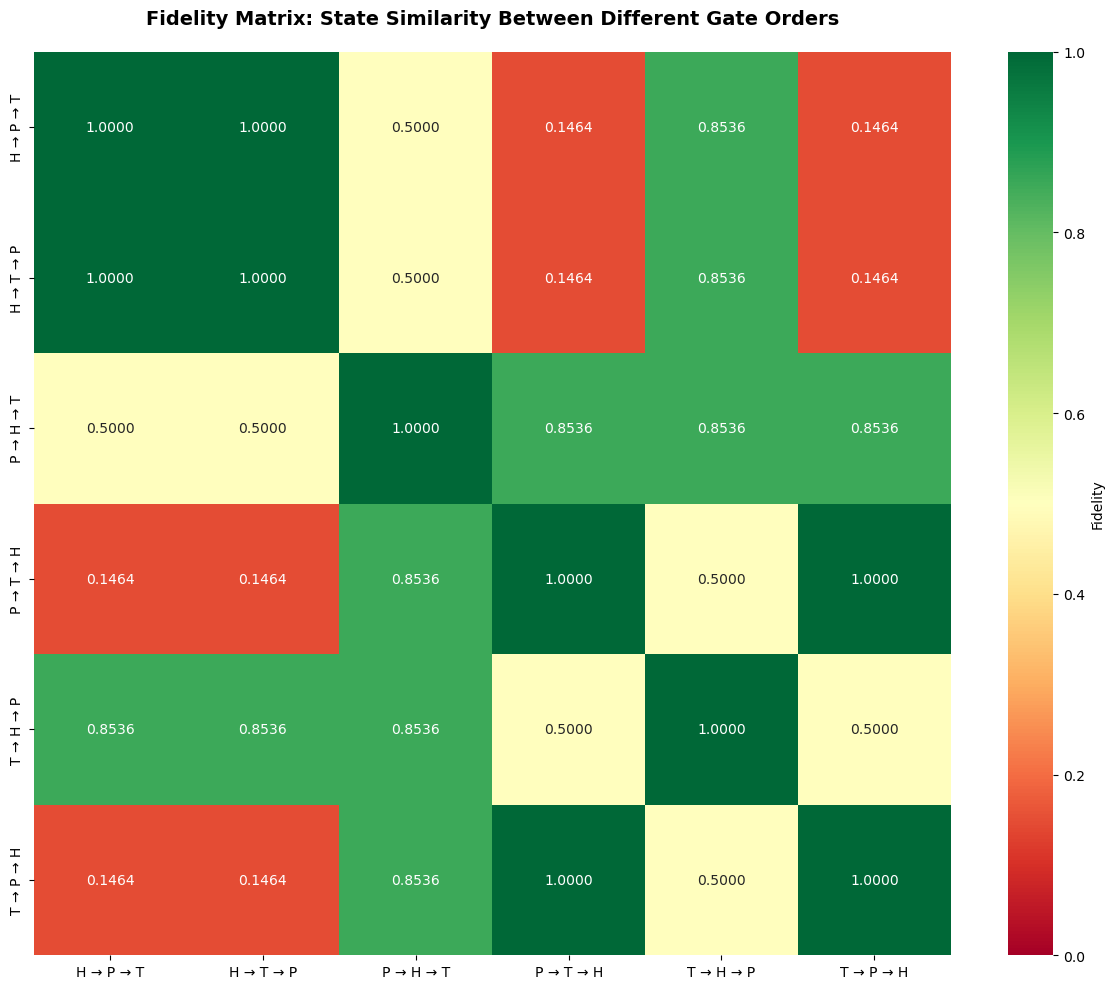

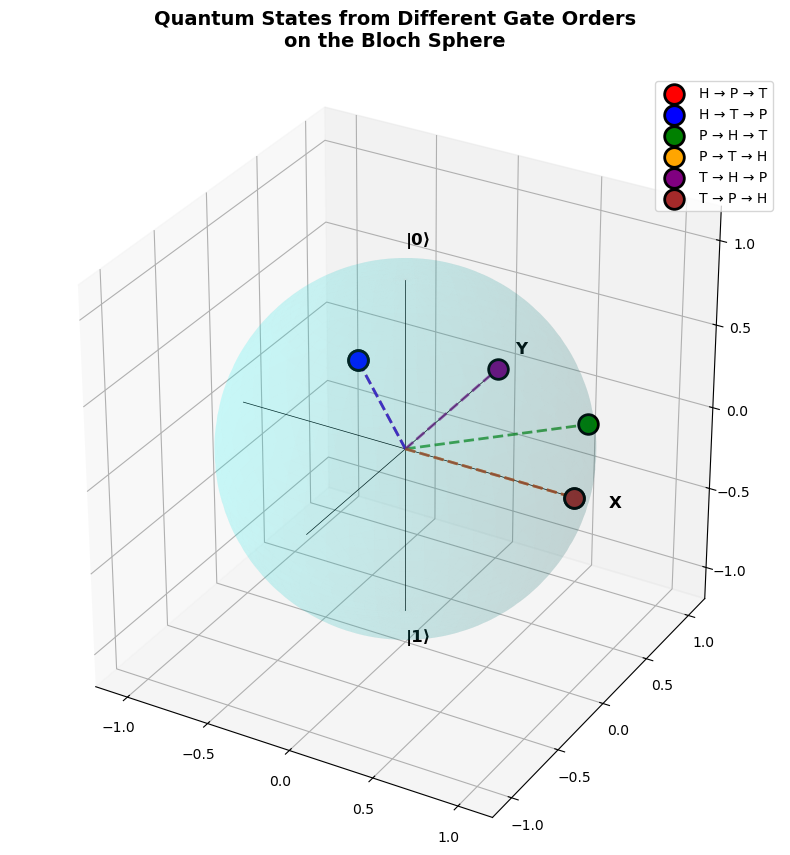

In [41]:
def main():
    """Main execution function"""
    
    print(f"Visualizations will be saved to: {output_dir}/")
    
    # Compare different gate orders
    results, orderings = compare_gate_orders()
    
    # Demonstrate non-commutativity
    demonstrate_non_commutativity()
    
    # Calculate fidelities and save heatmap
    fidelity_fig = calculate_fidelities(results, save_heatmap=True)
    
    # Visualize on Bloch sphere and save
    print("\n" + "="*80)
    print("VISUALIZATION")
    print("="*80)
    print("\nGenerating Bloch sphere visualization...")
    
    bloch_fig = visualize_bloch_sphere(results, 
                                       'Quantum States from Different Gate Orders\non the Bloch Sphere',
                                       'bloch_sphere_gate_orders')
    
    # Save additional data files
    save_gate_matrices()
    save_final_states(results)
    
    # Summary
    print("\n" + "="*80)
    print("CONCLUSION")
    print("="*80)
    print("\n✓ The order of quantum gates MATTERS!")
    print("✓ Different orderings produce DIFFERENT quantum states")
    print("✓ This demonstrates that unitary matrices generally do NOT commute")
    print("✓ In quantum computing, circuit design must carefully consider gate order")
    print("\nKey Insight:")
    print("  For arbitrary unitaries U and V: U×V ≠ V×U (in general)")
    print("  This is fundamental to quantum algorithm design!")
    
    print("\n" + "="*80)
    print("SUMMARY OF SAVED FILES")
    print("="*80)
    print(f"All files saved in: {output_dir}/")
    print("✓ bloch_sphere_gate_orders.png - 3D Bloch sphere visualization")
    print("✓ fidelity_heatmap.png - Fidelity matrix heatmap")
    print("✓ gate_matrices.txt - Individual gate matrices and properties")
    print("✓ final_states.txt - Complete state information for each gate ordering")
    print("="*80 + "\n")
    
    plt.show()

if __name__ == "__main__":
    main()